/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths to the dataset
train_dir = '/content/drive/MyDrive/chest_xray/chest_xray/train'
validation_dir = '/content/drive/MyDrive/chest_xray/chest_xray/val'
test_dir = '/content/drive/MyDrive/chest_xray/chest_xray/test'

# Data augmentation and preprocessing for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Preprocessing for validation and test data (only rescaling)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess the data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize images to 150x150
    batch_size=32,
    class_mode='binary'  # Binary classification
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 5256 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,  # Use all training samples
    epochs=20,  # Adjust epochs based on performance
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 973s 6s/step - accuracy: 0.7280 - loss: 0.5817 - val_accuracy: 0.6250 - val_loss: 0.7301
Epoch 2/20
  1/164 ━━━━━━━━━━━━━━━━━━━━ 6:42 2s/step - accuracy: 0.8750 - loss: 0.2792

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


164/164 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8750 - loss: 0.2792 - val_accuracy: 0.6250 - val_loss: 0.6132
Epoch 3/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 372s 2s/step - accuracy: 0.8262 - loss: 0.3602 - val_accuracy: 0.6250 - val_loss: 0.7271
Epoch 4/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8438 - loss: 0.2894 - val_accuracy: 0.6250 - val_loss: 0.6007
Epoch 5/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 375s 2s/step - accuracy: 0.8516 - loss: 0.3109 - val_accuracy: 0.6250 - val_loss: 0.8630
Epoch 6/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9062 - loss: 0.1259 - val_accuracy: 0.6250 - val_loss: 0.9957
Epoch 7/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 380s 2s/step - accuracy: 0.8599 - loss: 0.2941 - val_accuracy: 0.6875 - val_loss: 0.4799
Epoch 8/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8125 - loss: 0.3401 - val_accuracy: 0.6875 - val_loss: 0.4978
Epoch 9/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 373s 2s/step - accuracy: 0.8819 - loss: 0.2719 - val_accuracy: 0.6875 - 

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

20/20 ━━━━━━━━━━━━━━━━━━━━ 134s 7s/step - accuracy: 0.9246 - loss: 0.2665
Test Loss: 0.3138434886932373
Test Accuracy: 0.9006410241127014


In [ ]:
model.save('pneumonia_detection_model.h5')

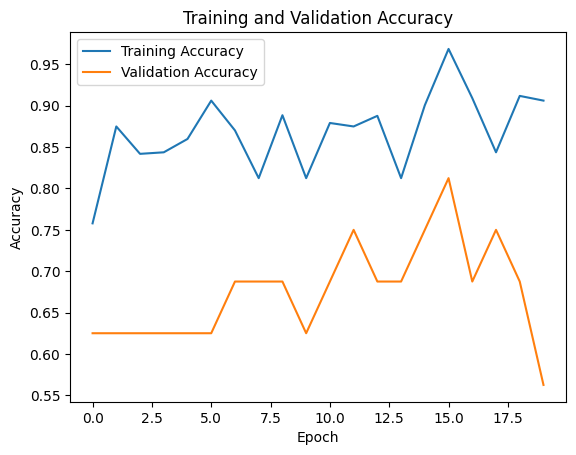

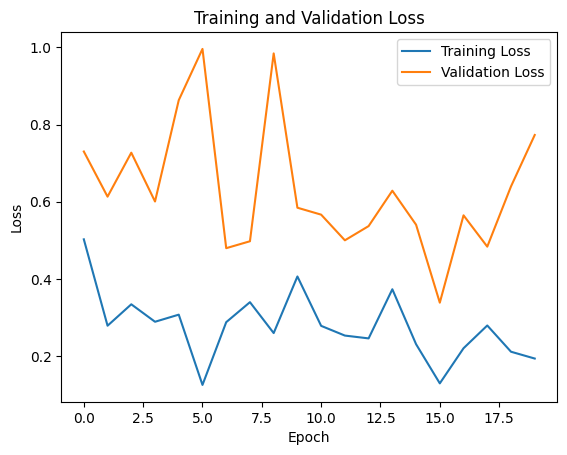

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 677ms/step


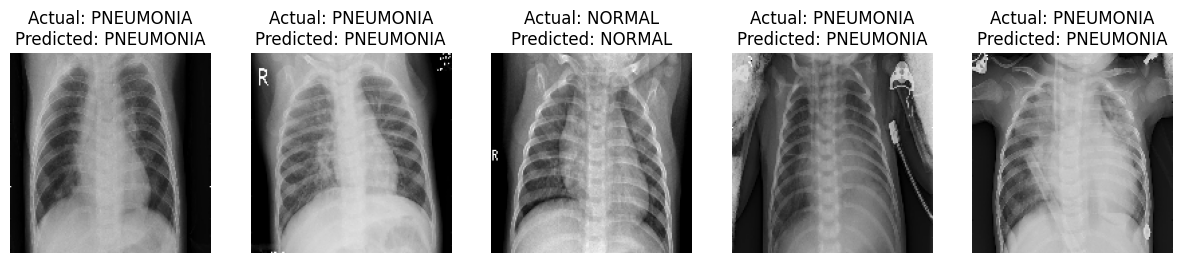

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Function to display images with predictions
def display_predictions(test_generator, model, num_images=5):
    # Get a batch of test images
    test_images, test_labels = next(test_generator)

    # Predict using the model
    predictions = model.predict(test_images)
    predicted_labels = (predictions > 0.5).astype(int).flatten()  # Convert probabilities to binary labels

    # Map binary labels to class names
    class_names = list(test_generator.class_indices.keys())

    # Display images with predictions
    plt.figure(figsize=(15, 10))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(test_images[i])
        plt.title(f'Actual: {class_names[int(test_labels[i])]}\nPredicted: {class_names[predicted_labels[i]]}')
        plt.axis('off')
    plt.show()

# Display predictions
display_predictions(test_generator, model, num_images=5)

20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step


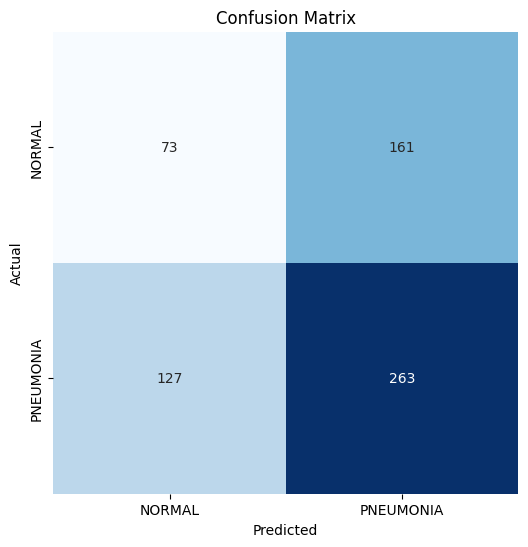

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.36      0.31      0.34       234
   PNEUMONIA       0.62      0.67      0.65       390

    accuracy                           0.54       624
   macro avg       0.49      0.49      0.49       624
weighted avg       0.52      0.54      0.53       624



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Get all test labels and predictions
test_labels = test_generator.classes
predictions = model.predict(test_generator)
predicted_labels = (predictions > 0.5).astype(int).flatten()

# Confusion Matrix
cm = confusion_matrix(test_labels, predicted_labels)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(test_labels, predicted_labels, target_names=test_generator.class_indices.keys()))

In [ ]:
# Save the model
model.save('pneumonia_detection_model.h5')

# Load the model
from tensorflow.keras.models import load_model
loaded_model = load_model('pneumonia_detection_model.h5')